<a href="https://colab.research.google.com/github/meganrice/BSAN-6070-Computer-Assignments/blob/main/CA01_India_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your name: Megan Rice
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [86]:
#import packages 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Data File Reading Section
## Write code to read in data from external sources here

In [87]:
#read datasets
df= pd.read_csv("/content/CA01_data.csv", encoding= 'cp1252')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/90
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/90
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/90
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/90
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/90


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [88]:
#Your code for this section here ...
#1
df.describe()

#2
df.shape

#3
df.count()

#4
df.isnull().sum()

#5
df.info()

#6
df.head(10)
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/15
435733,SAMP,12/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/15
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/15
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/15
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/15
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/15
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [89]:
# Cleaning up the data

#dropping columns that aren't required

# ... your code here
df.drop(columns= ["stn_code", "sampling_date", "location_monitoring_station"], inplace= True)

# dropping rows where no date is available

# ... your code here
df= df[df['date'].notna()]

In [90]:
# displaying final columns (data.columns)

# ... your code here
df.columns

Index(['state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm',
       'pm2_5', 'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [91]:
# ... Your code here
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

df.type = df.type.replace(types)

In [92]:
# Display top 10 records after codification of 'types'
# ... Your code here
df.head(10)

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,2/1/90
1,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,2/1/90
2,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,2/1/90
3,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,3/1/90
4,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,3/1/90
5,Andhra Pradesh,Hyderabad,NaN,RRO,6.4,25.7,NaN,NaN,NaN,3/1/90
6,Andhra Pradesh,Hyderabad,NaN,RRO,5.4,17.1,NaN,NaN,NaN,4/1/90
7,Andhra Pradesh,Hyderabad,NaN,I,4.7,8.7,NaN,NaN,NaN,4/1/90
8,Andhra Pradesh,Hyderabad,NaN,RRO,4.2,23.0,NaN,NaN,NaN,4/1/90
9,Andhra Pradesh,Hyderabad,NaN,I,4.0,8.9,NaN,NaN,NaN,5/1/90


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [93]:
# ... Your code here
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format= True)

df['year'] = pd.DatetimeIndex(df['date']).year

df.head()

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [ ]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here
COLS= (['so2','no2','rspm','spm','pm2_5'])
#COLS= df.iloc[:,4:9]
#COLS= df.loc[:,['so2','no2','rspm','spm','pm2_5']]

imp_mean= SimpleImputer(missing_values= np.nan, strategy= 'mean')
imp_mean= imp_mean.fit(COLS)
COLS= imp_mean.transform(COLS).ravel()

df.head()

#NOT WORKING

In [ ]:
COLS= df.iloc[:,4:9]

values = COLS.values
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
COLS = imputer.fit_transform(values)

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [11]:
# ... Your code here
#a
df.groupby('state').so2.agg(['median'])

,median
state,
Andhra Pradesh,5.0
Arunachal Pradesh,2.0
Assam,6.5
Bihar,11.0
Chandigarh,2.0
Chhattisgarh,12.7
Dadra & Nagar Haveli,8.3
Daman & Diu,7.6
Delhi,6.0


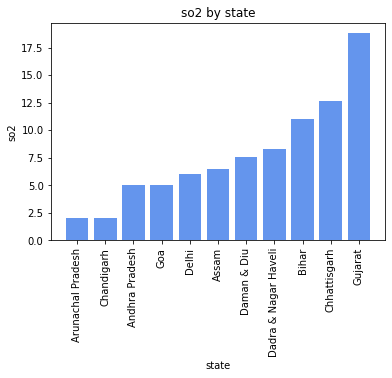

In [12]:
#b
so2 = df.groupby('state').so2.median().reset_index().sort_values(by= ['so2'])

plt.bar(so2.state, 
        so2.so2, 
        color= 'cornflowerblue')

plt.title('so2 by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('so2')
plt.show()

### no2 status

In [13]:
# ... Your code here
#a
df.groupby('state').no2.agg(['median'])

,median
state,
Andhra Pradesh,20.00
Arunachal Pradesh,5.00
Assam,14.00
Bihar,33.10
Chandigarh,16.00
Chhattisgarh,21.25
Dadra & Nagar Haveli,18.00
Daman & Diu,17.60
Delhi,47.00


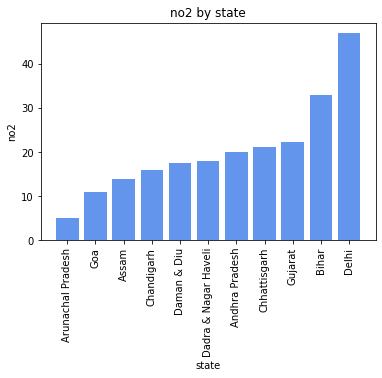

In [14]:
#b
no2 = df.groupby('state').no2.median().reset_index().sort_values(by= ['no2'])

plt.bar(no2.state, 
        no2.no2, 
        color= 'cornflowerblue')

plt.title('no2 by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('no2')
plt.show()

### rspm status

In [15]:
# ... Your code here
#a
df.groupby('state').rspm.agg(['median'])

,median
state,
Andhra Pradesh,74.0
Arunachal Pradesh,74.0
Assam,76.0
Bihar,107.0
Chandigarh,87.0
Chhattisgarh,104.0
Dadra & Nagar Haveli,80.0
Daman & Diu,78.0
Delhi,171.0


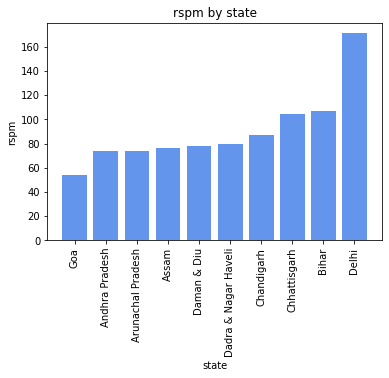

In [16]:
#b
rspm = df.groupby('state').rspm.median().reset_index().sort_values(by= ['rspm'])

plt.bar(rspm.state, 
        rspm.rspm, 
        color= 'cornflowerblue')

plt.title('rspm by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('rspm')
plt.show()

### spm status

In [17]:
# ... Your code here
#a
df.groupby('state').spm.agg(['median'])

,median
state,
Andhra Pradesh,184.0
Arunachal Pradesh,NaN
Assam,123.0
Bihar,252.0
Chandigarh,187.0
Chhattisgarh,218.0
Dadra & Nagar Haveli,170.0
Daman & Diu,140.0
Delhi,366.0


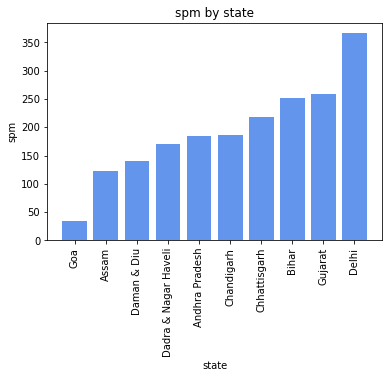

In [18]:
#b
spm = df.groupby('state').spm.median().reset_index().sort_values(by= ['spm'])

plt.bar(spm.state, 
        spm.spm, 
        color= 'cornflowerblue')

plt.title('spm by state')
plt.xlabel('state')
plt.xticks(rotation = 90)
plt.ylabel('spm')
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [99]:
# ... Your code here
df2 = df[df.state == 'Andhra Pradesh']

df3 = df2.groupby('year')
df3.head()

,state,location,agency,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...,...
23753,Andhra Pradesh,Visakhapatnam,Andhra Pradesh State Pollution Control Board,I,9.0,18.0,46.0,NaN,NaN,2015-01-01,2015
23754,Andhra Pradesh,Visakhapatnam,Andhra Pradesh State Pollution Control Board,I,8.0,18.0,27.0,NaN,NaN,2015-01-04,2015
23755,Andhra Pradesh,Visakhapatnam,Andhra Pradesh State Pollution Control Board,I,9.0,15.0,29.0,NaN,NaN,2015-01-07,2015
23756,Andhra Pradesh,Visakhapatnam,Andhra Pradesh State Pollution Control Board,I,7.0,17.0,78.0,NaN,NaN,2015-01-10,2015


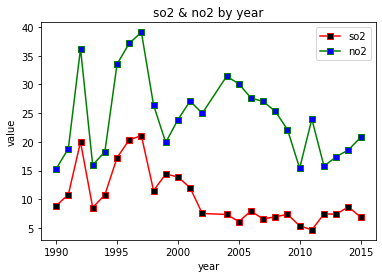

In [42]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here
#a
df2_pivot = df2.pivot_table(values= 'so2', index= 'year', aggfunc= 'mean')

df2_pivot1 = df2.pivot_table(values= 'no2', index= 'year', aggfunc= 'mean')

plt.plot(df2_pivot.index, df2_pivot.so2, linestyle= '-', marker= 's', markerfacecolor= 'black', color= 'red', label= 'so2')

plt.plot(df2_pivot1.index, df2_pivot1.no2, linestyle= '-', marker= 's', markerfacecolor= 'blue', color= 'green', label= 'no2')

plt.legend()
plt.title('so2 & no2 by year')
plt.xlabel('year')
plt.ylabel('value')
plt.show()

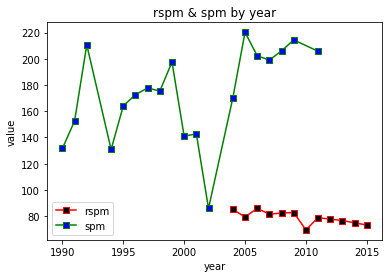

In [43]:
#b
df2_pivot3 = df2.pivot_table(values= 'rspm', index= 'year', aggfunc= 'mean')

df2_pivot4 = df2.pivot_table(values= 'spm', index= 'year', aggfunc= 'mean')

plt.plot(df2_pivot3.index, df2_pivot3.rspm, linestyle= '-', marker= 's', markerfacecolor= 'black', color= 'red', label= 'rspm')

plt.plot(df2_pivot4.index, df2_pivot4.spm, linestyle= '-', marker= 's', markerfacecolor= 'blue', color= 'green', label= 'spm')

plt.legend()
plt.title('rspm & spm by year')
plt.xlabel('year')
plt.ylabel('value')
plt.show()

Do you find anything alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....

